In [17]:
import os
from pathlib import Path
from operator import itemgetter
from collections import defaultdict
import scipy.stats as st
import numpy as np
import pandas as pd
import random
import string
import math

In [58]:
usernames_path = Path("./random_usernames.csv")
usernames_df = pd.read_csv(usernames_path)

In [91]:
def reset_df():
    global data
    global df
 
    # Initialize the pandas DataFrame
    df = pd.DataFrame(columns = ['user_id', 'username', 'rank', 'project_id'])
    df['project_id'].fillna('None', inplace=True)

    # print dataframe.

reset_df()
#df.head()

In [84]:
## Create a function that adds a bunch more projects to the dataframe
###acceptable_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
###generated_user_id = (random.sample(str(acceptable_numbers), 16))
#print(random.sample(acceptable_numbers, 3))

#while generated_user_id in df.values:
    #generated_user_id = str("0x" + ''.join(str(random.choice(acceptable_numbers) for i in range(12))))
def generate_projects():
    acceptable_numbers = string.digits
    acceptable_letters = string.ascii_letters

    generated_user_id = ( "0x" + ''.join(random.choice(acceptable_numbers) for i in range(16)) )
    while generated_user_id in df['user_id'].values:
        generated_user_id = ( "0x" + ''.join(random.choice(acceptable_numbers) for i in range(16)) )
    
    generated_project_id = ( ''.join(random.choice(acceptable_numbers) for i in range(12)) )
    while generated_project_id in df['user_id'].values:
        generated_project_id = ( "0x" + ''.join(random.choice(acceptable_numbers) for i in range(16)) )

    generated_name = ( ''.join(random.choice(acceptable_letters) for i in range(5))).capitalize()
    while generated_name in df['user_id'].values:
        generated_name = ( ''.join(random.choice(acceptable_letters) for i in range(5))).capitalize()

    generated_rank = 1500
    
    df.loc[df.shape[0]] = [generated_user_id, generated_name, generated_rank, generated_project_id]
    
def run_project_gen():
    number_generated = 0
    while True:
            try:
                number_generation = input("1. Select the number of projects you want to generate ( # ≤ 700 ):")
                number_generation = int(number_generation)
                break
            except ValueError:
                print(f"INPUT ERROR: {number_generation} cannot be inputted please choose a whole number")
    while number_generated < number_generation:
        generate_projects()
        number_generated += 1
    #df['thumbnails'] = thumbnail_df.sample(n = number_generation, ignore_index=True)
    df['username']= usernames_df.sample(n = number_generation, ignore_index=True)
    
#run_project_gen()

# Run Simulation

## Description
* This simulation is used to represent a sample of competitors that challenging in groups of 4.
* With only 1 winner, the winner's rank should increase, while the loser's ranks decrease.
* Assuming winners are picked randomly, the distribution of ranks should be a bell curve.

## Instructions
* Make sure all of the previous code has run
* Run the Following Code Block

* You will be asked to input 2 parameters
> 1. `Number of Projects`
> - This is the total number of competitors
> 2. `Number of Rounds`
> - This is the 

In [131]:
reset_df()

### Set the base values of the elo paramaters
alpha_1 = 0
alpha_2 = 0
alpha_3 = 0
alpha_4 = 0
winner = 0
k_value = 40
number_of_rounds = 0

### Below is the logic for randomly selecting 4 submissions
### More logic should be added so an individual can't compete against their own submissions
### also should require contest category is the same, so different categories don't compete
### also higher ranks should have a greater likelihood of being chosen than lower ranks


def select_match():
    
    ### doesn't have to be a global variable if it is only referenced inside of the single function
    global project_id1
    global project_id2
    global project_id3
    global project_id4
    global round_category
    
    random_project = "None"
    
    while random_project == "None":
        random_project = df['project_id'].sample().item()
    else:
        project_id1 = random_project
        #print("project_id1 is:" , random_project)

    while random_project == "None" or random_project == project_id1:
        random_project = df['project_id'].sample().item()
    else:
        project_id2 = random_project
        #print("project_id2 is:" , random_project)
    
    while random_project == "None" or random_project == project_id1 or random_project == project_id2:
        random_project = df['project_id'].sample().item()
    else:
        project_id3 = random_project
        #print("project_id3 is:" , random_project)

    while random_project == "None" or random_project == project_id1 or random_project == project_id2 or random_project == project_id3:
        random_project = df['project_id'].sample().item()
    else:
        project_id4 = random_project
        #print("project_id4 is:" , random_project)



# retreive the ranks of the selected projects
def grab_ranks():
    global r1_initial
    global r2_initial
    global r3_initial
    global r4_initial

    # Project 1
    project_1_df = df.loc[df['project_id'] == project_id1]
    r1_initial = project_1_df['rank'].item()
    
    # Project 2
    project_2_df = df.loc[df['project_id'] == project_id2]
    r2_initial = project_2_df['rank'].item()
    
    # Project 3
    project_3_df = df.loc[df['project_id'] == project_id3]
    r3_initial = project_3_df['rank'].item()
    
    # Project 4
    project_4_df = df.loc[df['project_id'] == project_id4]
    r4_initial = project_4_df['rank'].item()


## add the ranks to the probability equation
## Below is the logic that implements the ELO Algorithm
def get_probability():
    global p1
    global p2
    global p3
    global p4

    r1 = r1_initial
    r2 = r2_initial
    r3 = r3_initial
    r4 = r4_initial
    
    # Converts current rank to probability of winning
    p1 = (1/(1 + 10**((r2-r1)/400)) + 1/(1 + 10**((r3-r1)/400)) + 1/(1 + 10**((r4-r1)/400)))/6
    p2 = (1/(1 + 10**((r1-r2)/400)) + 1/(1 + 10**((r3-r2)/400)) + 1/(1 + 10**((r4-r2)/400)))/6
    p3 = (1/(1 + 10**((r1-r3)/400)) + 1/(1 + 10**((r2-r3)/400)) + 1/(1 + 10**((r4-r3)/400)))/6
    p4 = (1/(1 + 10**((r1-r4)/400)) + 1/(1 + 10**((r2-r4)/400)) + 1/(1 + 10**((r3-r4)/400)))/6

## Code the winner input logic
## For this simmulation all winners are selected randomly, which should result in a noraml distribution model
def decide_winner():
    global winner
    global alpha_1
    alpha_1 = 0
    global alpha_2
    alpha_2 = 0
    global alpha_3
    alpha_3 = 0
    global alpha_4
    alpha_4 = 0
    while winner != 1 and winner != 2 and winner != 3 and winner != 4:
        while True:
            try:
                winner = input("select winner (1,2,3, or 4):")
                winner = int(winner)
                break
            except ValueError:
                print(f"INPUT ERROR: {winner} cannot be inputted please choose '1','2','3',or '4'")
        if winner == 1:
            alpha_1 = 1
        elif winner == 2:
            alpha_2 = 1
        elif winner == 3:
            alpha_3 = 1
        elif winner == 4:
            alpha_4 = 1
        else:
            print(f"INPUT ERROR: {winner} cannot be inputted please choose '1','2','3',or '4'")


#select random winners for a large simulation          
def gen_weighted_winners():
    global winner
    global alpha_1
    alpha_1 = 0
    global alpha_2
    alpha_2 = 0
    global alpha_3
    alpha_3 = 0
    global alpha_4
    alpha_4 = 0
    numbers = [1,2,3,4]
    weighted_random_index = np.random.choice(numbers, 1, p=[p1,p2,p3,p4])
    winner = weighted_random_index[0]
    if winner == 1:
        alpha_1 = 1
    elif winner == 2:
        alpha_2 = 1
    elif winner == 3:
        alpha_3 = 1
    elif winner == 4:
        alpha_4 = 1
            
#select random winners for a large simulation          
def gen_random_winners():
    global winner
    global alpha_1
    alpha_1 = 0
    global alpha_2
    alpha_2 = 0
    global alpha_3
    alpha_3 = 0
    global alpha_4
    alpha_4 = 0
    numbers = [1, 2, 3, 4]
    random_index = random.randint(0,len(numbers)-1)
    winner = numbers[random_index]
    if winner == 1:
        alpha_1 = 1
    elif winner == 2:
        alpha_2 = 1
    elif winner == 3:
        alpha_3 = 1
    elif winner == 4:
        alpha_4 = 1


#code the logic to find the new ranks after winner is selected    
def determine_outcome(): 
    global r1_final
    global r2_final
    global r3_final
    global r4_final
    r1_final = round(r1_initial + k_value*(alpha_1 - (p1)))
    r2_final = round(r2_initial + k_value*(alpha_2 - (p2)))
    r3_final = round(r3_initial + k_value*(alpha_3 - (p3))) 
    r4_final = round(r4_initial + k_value*(alpha_4 - (p4))) 


### r_final is then plugged back into the the dataframe as the new rank value

### Write the logic to insert the new ranks back into the original data frame

def update_ranks():
    df.loc[df.project_id == project_id1,'rank'] = r1_final
    df.loc[df.project_id == project_id2,'rank'] = r2_final
    df.loc[df.project_id == project_id3,'rank'] = r3_final
    df.loc[df.project_id == project_id4,'rank'] = r4_final

## add logic to count number of wins and losses each project gets

r1_list = []
r2_list = []
r3_list = []
r4_list = []

run_project_gen()

total_num_rounds = int(input("2. Select number of rounds (recommended: 10,000 > # > 100)"))
print("\nLoading, please wait...")

while number_of_rounds < total_num_rounds:
    select_match()
    grab_ranks()
    get_probability()
    gen_weighted_winners()
    #decide_winner()
    determine_outcome()
    number_of_rounds += 1
    update_ranks()

print("\nSimulation complete\n")

1. Select the number of projects you want to generate ( # ≤ 700 ): 700
2. Select number of rounds (recommended: 10,000 > # > 100) 50000



Loading, please wait...

Simulation complete



## Analysis of Simulation

********************
Table Distribution
********************
Min_Value = 917 
Max_Value = 2397 
Avg_Value 1499.9542857142858
********************


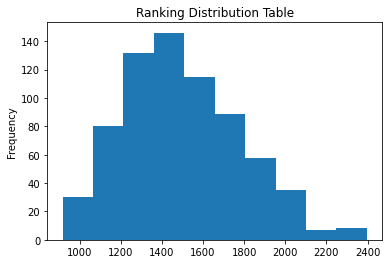

In [132]:
def describe_distribution():
    print("********************")
    print("Table Distribution")
    print("********************")
    print(f"Min_Value = {df['rank'].min()}",f"\nMax_Value = {df['rank'].max()}", f"\nAvg_Value {df['rank'].mean()}")
    print("********************")
describe_distribution()
df.plot(legend=False,kind='hist',title='Ranking Distribution Table');